# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Data

In [ ]:
df = pd.read_csv('/content/Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [ ]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [ ]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.838154,1.834327,1.347654,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.358788,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.401537,0.727856,0.848073,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479690,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [ ]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 52000 rows and 26 columns.


In [ ]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 43


In [ ]:
missing_values = df.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

Missing values in each column:
Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                               322
Number_of_Vehicles                                0
Number_of_Casualties                           1041
Date                                              0
Day_of_Week                                       0
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
2nd_Road_Class                                    0
2nd_Road_Number                                   0
Pedestrian_Crossing-Human_Control

In [ ]:
for column in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for {column}:")
    print(df[column].value_counts())


Value counts for Date:
Date
04/11/2005    43
14/08/2007    36
22/09/2006    36
24/11/2006    34
12/12/2005    33
              ..
02/05/2010     3
25/02/2007     3
21/02/2013     2
24/03/2013     2
03/02/2013     1
Name: count, Length: 3286, dtype: int64

Value counts for Local_Authority_(Highway):
Local_Authority_(Highway)
E10000016    1465
E10000030    1313
E10000017    1199
E10000014    1068
E10000012    1047
             ... 
S12000005      30
S12000027      14
EHEATHROW      13
S12000023       6
S12000013       6
Name: count, Length: 206, dtype: int64

Value counts for Road_Type:
Road_Type
Single carriageway    38852
Dual carriageway       7737
Roundabout             3475
One way street         1099
Slip road               542
Unknown                 295
Name: count, dtype: int64

Value counts for Pedestrian_Crossing-Human_Control:
Pedestrian_Crossing-Human_Control
None within 50 metres                 51718
Control by other authorised person      163
Control by school crossing p

In [ ]:
df['Accident_Severity'].fillna(df['Accident_Severity'].mode()[0], inplace=True)
df['Light_Conditions'].fillna(df['Light_Conditions'].mode()[0], inplace=True)
df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mode()[0], inplace=True)
df['Number_of_Casualties'].fillna(df['Number_of_Casualties'].mode()[0], inplace=True)

In [ ]:
missing_values = df.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

Missing values in each column:
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilitie

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
df_numeric = df[numeric_columns]

In [ ]:
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

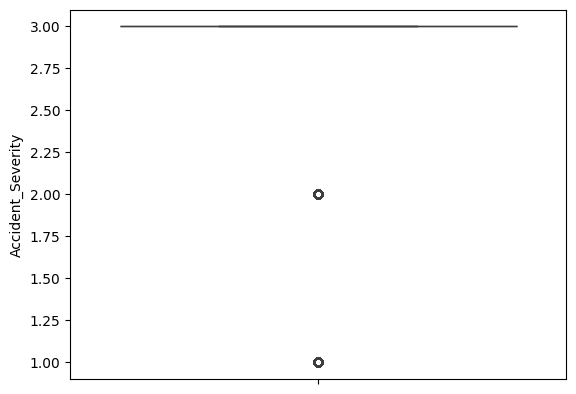

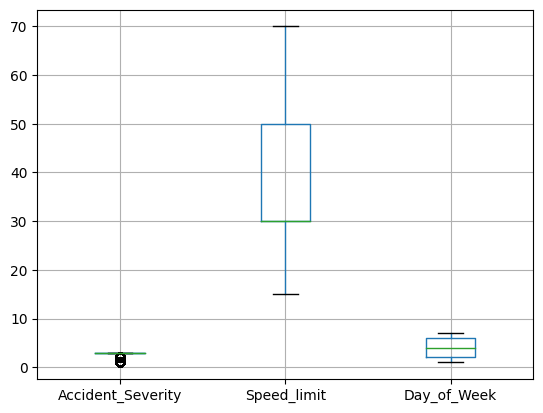

In [ ]:
sns.boxplot(df['Accident_Severity'])
plt.show()
df.boxplot(column=['Accident_Severity', 'Speed_limit', 'Day_of_Week'])
plt.show()

In [ ]:
z_scores = stats.zscore(df_numeric)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_no_outliers = df_numeric[filtered_entries]

In [ ]:
df_no_outliers = df_no_outliers.fillna(df_no_outliers.mean())

In [ ]:
if df_no_outliers.empty:
    print("The DataFrame is empty after removing outliers. Adjust the threshold.")
else:
    print(f"Data shape after removing outliers: {df_no_outliers.shape}")

The DataFrame is empty after removing outliers. Adjust the threshold.


In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_no_outliers)

df_scaled = pd.DataFrame(scaled_features, columns=df_no_outliers.columns)

ValueError: Found array with 0 sample(s) (shape=(0, 17)) while a minimum of 1 is required by StandardScaler.

In [ ]:
print(df_no_outliers.shape)
print(df_no_outliers.head())

(0, 17)


In [ ]:
print(df_no_outliers.head())

Empty DataFrame
Columns: [Location_Easting_OSGR, Location_Northing_OSGR, Longitude, Latitude, Police_Force, Accident_Severity, Number_of_Vehicles, Number_of_Casualties, Day_of_Week, Local_Authority_(District), 1st_Road_Class, 1st_Road_Number, Speed_limit, 2nd_Road_Class, 2nd_Road_Number, Urban_or_Rural_Area, Year]
Index: []


## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
features = df[['Number_of_Vehicles', 'Speed_limit']]

In [ ]:
print("Original Data:")
print(features.head())

Original Data:
   Number_of_Vehicles  Speed_limit
0                   1           70
1                   2           30
2                   2           30
3                   1           30
4                   2           30


In [ ]:
features.fillna(features.mean(), inplace=True)

Data After Imputation:
Number_of_Vehicles    0
Speed_limit           0
dtype: int64


<ipython-input-71-dd3b81520d01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(features.mean(), inplace=True)


In [ ]:
print("Data After Imputation:")
print(features.isnull().sum())

Data After Imputation:
Number_of_Vehicles    0
Speed_limit           0
dtype: int64


In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
scaled_features_df = pd.DataFrame(scaled_features, columns=['Number_of_Vehicles', 'Speed_limit'])

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

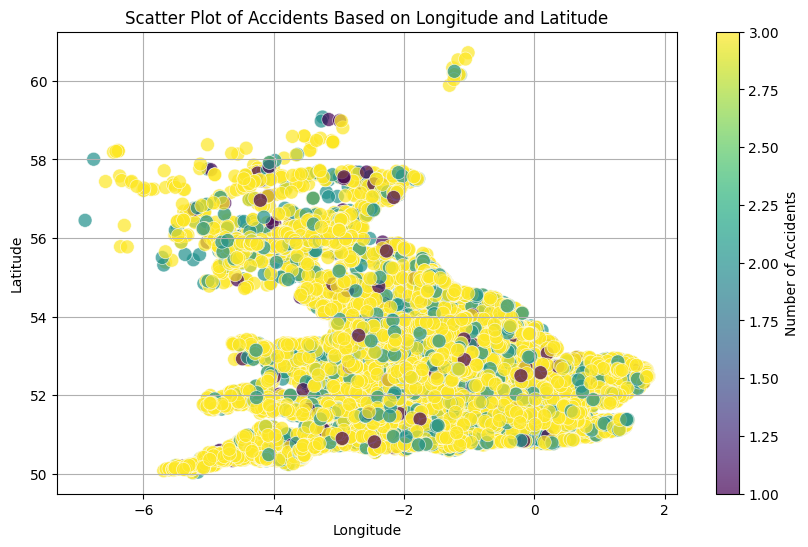

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Accident_Severity'], cmap='viridis', s=100, alpha=0.7, edgecolors='w', linewidth=0.5)
plt.colorbar(label='Number of Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Accidents Based on Longitude and Latitude')
plt.grid(True)
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.DataFrame({
    'Number_of_Vehicles': [2, 3, 4, 1, 5],
    'Speed_limit': [30, 40, 50, 30, 60]
})
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [ ]:
df = df.drop(columns=['Date'])
print(df)

       Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
0                   560530.0                103950.0   0.277298  50.812789   
1                   508860.0                187170.0  -0.430574  51.572846   
2                   314460.0                169130.0  -3.231459  51.414661   
3                   341700.0                408330.0  -2.881800  53.568318   
4                   386488.0                350090.0  -2.203020  53.047882   
...                      ...                     ...        ...        ...   
51995               475125.0                319380.0  -0.888006  52.766777   
51996               456682.0                127058.0  -1.192915  51.040030   
51997               540510.0                152250.0   0.012032  51.252055   
51998               434720.0                334000.0  -1.485264  52.902301   
51999               454710.0                185430.0  -1.212104  51.565050   

       Police_Force  Accident_Severity  Number_of_Vehicles  \
0

In [ ]:
print(df.dtypes)

Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                              float64
Number_of_Vehicles                               int64
Number_of_Casualties                           float64
Day_of_Week                                      int64
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
2nd_Road_Class                                   int64
2nd_Road_Number                                  int64
Pedestrian_Crossing-Human_Control               object
Pedestrian

In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')

In [ ]:
df = df.fillna(0)

In [ ]:
df = df.dropna()

In [ ]:
df = df.astype(int)

In [ ]:
wcss = []
max_clusters = min(10, len(df))
for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

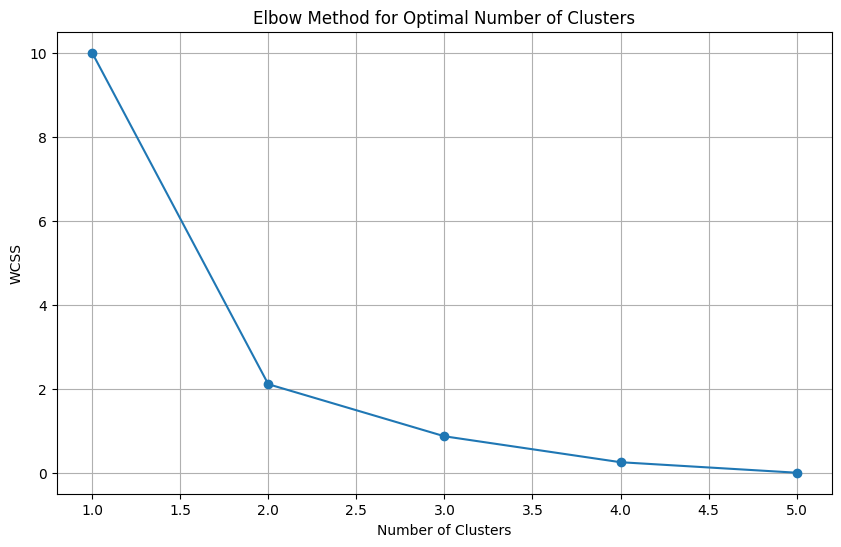

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

In [ ]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

print(df)

   Number_of_Vehicles  Speed_limit  Cluster
0                   2           30        2
1                   3           40        0
2                   4           50        0
3                   1           30        2
4                   5           60        1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Evaluation
Evaluate the clustering result using appropriate metrics.


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [ ]:
silhouette_avg = silhouette_score(scaled_features, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.289852957202287


In [ ]:
calinski_harabasz_avg = calinski_harabasz_score(scaled_features, df['Cluster'])
print(f'Calinski-Harabasz Index: {calinski_harabasz_avg}')

Calinski-Harabasz Index: 10.525423728813559


In [ ]:
davies_bouldin_avg = davies_bouldin_score(scaled_features, df['Cluster'])
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')

Davies-Bouldin Index: 0.42820945342396977


## Plot the data points with their predicted cluster center

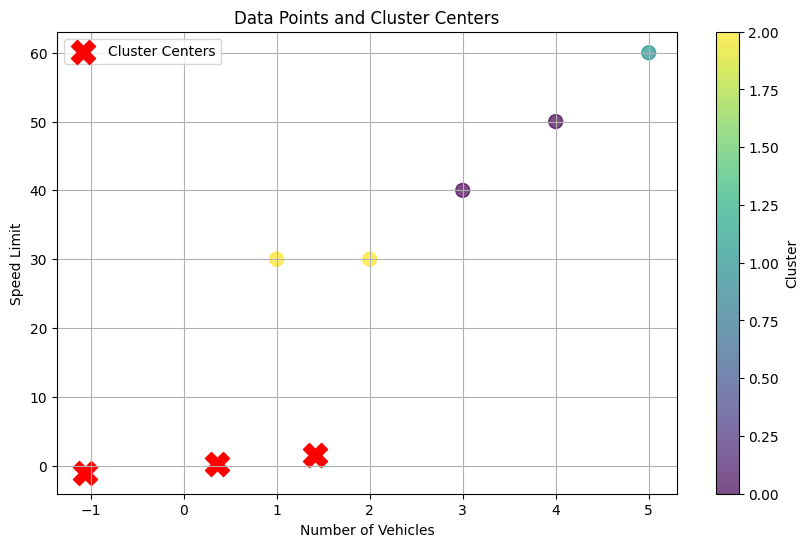

In [ ]:
cluster_centers = kmeans.cluster_centers_
plt.figure(figsize=(10, 6))

scatter = plt.scatter(df['Number_of_Vehicles'], df['Speed_limit'],
                      c=df['Cluster'], cmap='viridis', s=100, alpha=0.7)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            s=300, c='red', marker='X', label='Cluster Centers')

plt.xlabel('Number of Vehicles')
plt.ylabel('Speed Limit')
plt.title('Data Points and Cluster Centers')
plt.legend()
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
   Feature one:
   1. Number of Vehicles:The number of vehicles involved in the accident is a critical factor when analyzing traffic accidents. It is the main cause of accidents and their statistics. Grouping based on this feature can help identify patterns related to multi-vehicle collisions versus single-vehicle accidents. In my opinion, this feature can be compatible with any other feature and can be combined with any other feature to appear as a third feature.

   Feature two:
2. Speed Limit:
 The speed limit is a major factor affecting an accident. Accidents that occur in high-speed zones are often more serious than those that occur in low-speed zones. Grouping based on speed limits can help identify areas or conditions where accidents are more likely to occur or are more serious.

* **Number of Clusters Choices:**
   -First, I am not sure of my answer because I converted the data type and this affected the results, but this is what I tried to do. I tried several numbers of groups: I experimented with dividing the data into different numbers of groups (from 1 to a specific number).
I calculated the sum of the distances within each group: For each number of groups, I calculated what is called the “sum of distances within groups” (WCSS), which is a measure of how close the data within each group is to each other.
I plotted the results: you will see that the sum of the distances decreases quickly at first and then begins to decrease more slowly at a certain point
I chose the optimal number of groups: I chose 3 groups because at this point reducing the number of distances becomes not very important.

* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
   Three metrics were used:
Shadow score: This score measures how similar each point in a group is to points in its own group compared to points in other groups.
Kalinsky-Harapaz index: This measure looks at the ratio of the sum of distances between groups to the sum of distances within groups.
Davies-Bouldin Index: Evaluates how well groups are separated, with a lower value indicating better separation.
These metrics help understand how well the clustering algorithm groups similar data points together while keeping different groups distinct.


* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?
   Scenario simulation: Simulate various accident scenarios changing weather conditions or speed limits to understand potential outcomes and risk factors.
Impact analysis: Evaluate the impact of different interventions for example, changes in speed limits or road safety features on clustering results.